# Generate REC

In [3]:
import numpy as np
import cv2
from random import randint, random
from scipy import signal
np.random.seed(5)

size = (64, 64, 3)

for i in range(500):
    flag = randint(0,1)

    stx = randint(1, 40)
    sty = randint(1, 40)
    width = randint(20, 40)
    heigh = randint(20, 40)

    start_point = (stx, sty)
    end_point = (stx+width, sty+heigh)
    color = (randint(2, 5), randint(2, 5), randint(2, 5))
    thickness = randint(2, 5)

    img = np.ones(size)*255
    img = cv2.rectangle(img, start_point, end_point, color, thickness)
    img_float32 = np.float32(img)
    gray = cv2.cvtColor(img_float32, cv2.COLOR_BGR2GRAY)
    # print(gray.shape)
    kernal = np.random.random((3,3))
    if flag == 1:
        gray = signal.convolve2d(gray, kernal, "same")

    cv2.imwrite("/content/train/rec/{}.png".format(i), gray)
    # cv2.imshow("Img", gray)

# cv2.waitKey(0)
print("Done")

Done


In [5]:
def generate_cir(num=50):
    size = (64, 64, 3)
    for i in range(num):
        flag = randint(0,1)

        stx = randint(1, 40)
        sty = randint(1, 40)
        radius = randint(10, 30)


        center_coordinates = (stx, sty)

        color = (randint(2, 5), randint(2, 5), randint(2, 5))
        thickness = randint(5, 10)

        img = np.ones(size)*255

        img = cv2.circle(img, center_coordinates, radius, color, thickness)
        img_float32 = np.float32(img)
        gray = cv2.cvtColor(img_float32, cv2.COLOR_BGR2GRAY)
        # print(gray.shape, i)
        kernal = np.random.random((3,3))
        if flag == 1:
            gray = signal.convolve2d(gray, kernal, "same")

        cv2.imwrite("train/cir/{}.png".format(i), gray)


# cv2.waitKey(0)
generate_cir(num=500)

In [6]:
import tensorflow as tf

In [7]:
# Load Data

In [8]:
import numpy as np
import cv2

In [9]:
import matplotlib.pyplot as plt

In [77]:
import os

In [78]:
image_path = "/content/train/rec"
rimg = []
rlab = []
for i in os.listdir(image_path):
  path = image_path + "/" + i
  rimg.append(cv2.imread(path, 0))
  rlab.append(0)
  # break


In [79]:
image_path = "/content/test/rec"
rtimg = []
rtlab = []
for i in os.listdir(image_path):
  path = image_path + "/" + i
  rtimg.append(cv2.imread(path, 0))
  rtlab.append(0)
  # break


In [80]:
image_path = "/content/train/cir"
cimg = []
clab = []
for i in os.listdir(image_path):
  path = image_path + "/" + i
  cimg.append(cv2.imread(path, 0))
  clab.append(1)
  # break


In [81]:
image_path = "/content/test/cir"
ctimg = []
ctlab = []
for i in os.listdir(image_path):
  path = image_path + "/" + i
  ctimg.append(cv2.imread(path, 0))
  ctlab.append(1)
  # break


In [82]:
rimg = np.array(rimg)
cimg = np.array(cimg)
rlab = np.array(rlab)
clab = np.array(clab)

In [83]:
rtimg = np.array(rimg)
ctimg = np.array(cimg)
rtlab = np.array(rlab)
ctlab = np.array(clab)

In [84]:
rimg.shape

(500, 64, 64)

In [85]:
cimg.shape, clab.shape

((500, 64, 64), (500,))

In [86]:
xtrain = np.concatenate((rimg, cimg), axis=0)

In [87]:
xtest = np.concatenate((rtimg, ctimg), axis=0)

In [88]:
ytrain = np.concatenate((rlab, clab), axis=0)

In [89]:
ytest = np.concatenate((rtlab, ctlab), axis=0)

In [90]:
xtrain.shape

(1000, 64, 64)

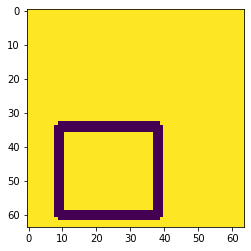

In [91]:
plt.imshow(xtrain[499])

In [92]:
clas = ["rec", "cir"]

In [93]:
import copy

In [94]:
def shuufle(data, label=2):
    lenth = int(len(data)/2)
    for i in range(lenth):
        index = randint(1, lenth)-1
        # print(index, index+lenth)
        temp = copy.deepcopy(data[index])
        data[index] = data[index+lenth]
        data[index+lenth] = temp

        temp = copy.deepcopy(label[index])
        label[index] = label[index+lenth]
        label[index+lenth] = temp

    return data, label

In [95]:
X_train, y_train = shuufle(xtrain, ytrain)

In [96]:
X_test, y_test = shuufle(xtest, ytest)

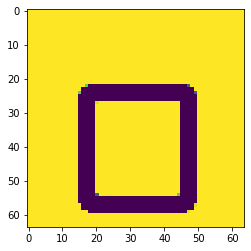

In [97]:
plt.imshow(X_train[160])

In [98]:
X_train = X_train/255

In [99]:
X_test = X_test/255

# CNN Model

In [100]:
def create_classical_model():
    # A simple model based off LeNet from https://keras.io/examples/mnist_cnn/
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, [3, 3], activation='relu', input_shape=(64,64,1)))
    model.add(tf.keras.layers.Conv2D(64, [3, 3], activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(2, activation='softmax'))
    return model


model = create_classical_model()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 30, 30, 64)        0         
                                                                 
 flatten_5 (Flatten)         (None, 57600)             0         
                                                                 
 dense_10 (Dense)            (None, 128)               7372928   
                                                      

In [101]:
# model.compile(optimizer="adam", loss=tf.keras.losses.categorical_crossentropy, metrics=['accuray'])

In [102]:
y_train.shape

(1000,)

In [103]:
model.fit(X_train, y_train, epochs=5, batch_size=12)

Epoch 1/5
84/84 [==============================] - 1s 9ms/step - loss: 0.5340 - accuracy: 0.7980
Epoch 2/5
84/84 [==============================] - 1s 8ms/step - loss: 0.0326 - accuracy: 0.9900
Epoch 3/5
84/84 [==============================] - 1s 6ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 4/5
84/84 [==============================] - 1s 6ms/step - loss: 5.4704e-04 - accuracy: 1.0000
Epoch 5/5
84/84 [==============================] - 1s 6ms/step - loss: 3.9084e-04 - accuracy: 1.0000


In [104]:
model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 6ms/step - loss: 1.5261e-04 - accuracy: 1.0000


[0.00015261273074429482, 1.0]

In [149]:
pred = model.predict(X_test)

In [152]:
y_pred = [np.argmax(i) for i in pred]

In [150]:
np.argmax(pred[15]), clas[np.argmax(pred[15])]

(0, 'rec')

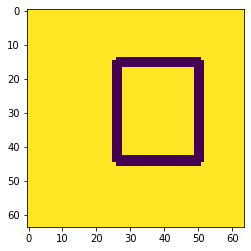

In [113]:
plt.imshow(X_test[15])

In [114]:
ytest[15]

0

# CM 

In [147]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix


In [153]:
M = confusion_matrix(ytest, y_pred)
M

array([[500,   0],
       [  0, 500]])

In [155]:
import seaborn as  sns

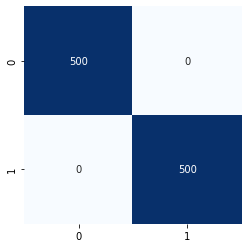

In [156]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(ytest, y_pred)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

# Custom Prediction

In [169]:
im = np.array([cv2.imread("/content/circle.png", 0)/255])
im

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]])

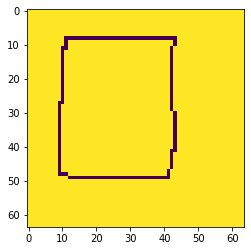

In [170]:
plt.imshow(im[0])

In [171]:
im.shape

(1, 64, 64)

In [172]:
res = model.predict(im)

In [173]:
np.argmax(res[0]), clas[np.argmax(res[0])]

(0, 'rec')

In [174]:
# model.save("rec_cir_cnn.h5")